In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='Malgun Gothic' )
!pip install koreanize-matplotlib
from IPython.display import display
import koreanize_matplotlib
import seaborn as sns


In [2]:
origin_train=pd.read_csv("/Users/chanhaeng17/Downloads/3주차/train.csv",encoding='cp949')
origin_test=pd.read_csv("/Users/chanhaeng17/Downloads/3주차/test.csv",encoding='cp949')
data_train=origin_train.copy()
data_test=origin_test.copy()


In [3]:
data_train

,Date,Rented Bike Count,Hour,Temperature(吏_),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(吏_),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
data_test

,Date,Hour,Temperature(吏_),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(吏_),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 기상청 데이터를 이용해 결측치 채우기
 * https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
 * https://www.weather.go.kr/w/resources/pdf/kma_data_portal_guide.pdf
 * 일단 이 데이터로 결측치를 채우기 적절한지 판단하기 위해 2가지 정도 생각해볼 수 있다.
   1. 결측치를 제외한 나머지 값들이 모두 동일한가?
   2. 결측치 부분에 적절한 값이 들어가 있는가?
   

# **기온 결측치 채우기**
![설명](이슬점공식.png)

- Dewpoint = 이슬점
- T = 기온
- RH = humidity

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(吏_)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(吏_)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [7]:
print(data_train.columns)
print(data_test.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(吏_)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(吏_)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
Index(['Date', 'Hour', 'Temperature(吏_)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(吏_)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


찾은 Temperature 컬럼: 'Temperature(吏_)'
Temperature 존재? True
찾은 Dew 컬럼: 'Dew point temperature(吏_)'
Dewpoint 존재? True


<Axes: xlabel='Temperature', ylabel='Dewpoint'>

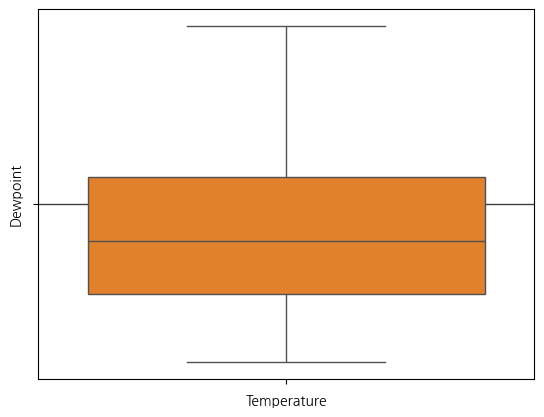

In [8]:
# 보이지 않는 공백 정리
data_train.columns = data_train.columns.astype(str).str.strip()
import seaborn as sns

# ---- Temperature 자동 찾기 ----
temp_col = [c for c in data_train.columns 
            if c.strip().lower().startswith('temperature')][0]

print("찾은 Temperature 컬럼:", repr(temp_col))

# 깔끔한 이름으로 변경
data_train = data_train.rename(columns={temp_col: 'Temperature'})

# 확인
print("Temperature 존재?", 'Temperature' in data_train.columns)

# 박스플롯
sns.boxplot(x=data_train['Temperature'])
# ---- Dew Point Temperature 자동 찾기 ----
dew_col = [c for c in data_train.columns 
            if 'dew' in c.lower()][0]

print("찾은 Dew 컬럼:", repr(dew_col))

# 이름 정리
data_train = data_train.rename(columns={dew_col: 'Dewpoint'})

# 확인
print("Dewpoint 존재?", 'Dewpoint' in data_train.columns)

# 박스플롯
sns.boxplot(data_train['Dewpoint'])


찾은 Temperature 컬럼: 'Temperature'
Temperature 존재? True
찾은 Dew 컬럼: 'Dew point temperature(吏_)'
Dewpoint 존재? True


<Axes: xlabel='Temperature', ylabel='Dewpoint'>

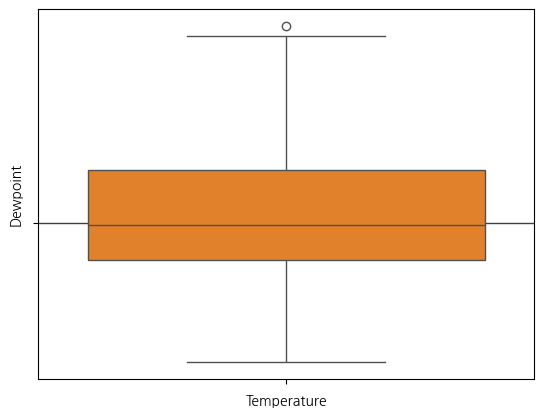

In [10]:
# 보이지 않는 공백 정리
data_test.columns = data_test.columns.astype(str).str.strip()
import seaborn as sns

# ---- Temperature 자동 찾기 ----
temp_col = [c for c in data_test.columns 
            if c.strip().lower().startswith('temperature')][0]

print("찾은 Temperature 컬럼:", repr(temp_col))

# 깔끔한 이름으로 변경
data_test = data_test.rename(columns={temp_col: 'Temperature'})

# 확인
print("Temperature 존재?", 'Temperature' in data_test.columns)

# 박스플롯
sns.boxplot(x=data_test['Temperature'])
# ---- Dew Point Temperature 자동 찾기 ----
dew_col = [c for c in data_test.columns 
            if 'dew' in c.lower()][0]

print("찾은 Dew 컬럼:", repr(dew_col))

# 이름 정리
data_test = data_test.rename(columns={dew_col: 'Dewpoint'})

# 확인
print("Dewpoint 존재?", 'Dewpoint' in data_test.columns)

# 박스플롯
sns.boxplot(data_test['Dewpoint'])

In [11]:
missing_Temp=data_train["Temperature"].isna()
missing_Temp1=data_test["Temperature"].isna()

In [14]:
missing_Temp1.sum()

np.int64(76)

In [54]:
data_train["Dewpoint"].isna().sum()

np.int64(0)

In [15]:
missing_Temp.sum()

np.int64(800)

In [16]:
data_test["Dewpoint"].isna().sum()

np.int64(0)

In [17]:
data_train=data_train.rename(columns={'Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed',})
data_test=data_test.rename(columns={'Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed',})

In [19]:
(data_train["Humidity"]<=0).sum()

np.int64(17)

In [20]:
(data_test["Humidity"]<=0).sum()

np.int64(0)

In [21]:
data_train["Humidity"].isna().sum()

np.int64(0)

In [22]:
Hum_median = data_train['Humidity'].median()
data_train.loc[data_train['Humidity'] <= 0, 'Humidity'] = Hum_median
print("0 이하 값 개수:", (data_train['Humidity'] <= 0).sum())

0 이하 값 개수: 0


In [23]:
def estimate_Temperature(Dewpoint, Humidity):
    def Dewpoint_formula(Temperature):
        return (243.12 * (np.log(Humidity/100) + (17.62*Temperature)/(243.12+Temperature))) / \
               (17.62 - (np.log(Humidity/100) + (17.62*Temperature)/(243.12+Temperature)))

    # T 탐색 범위 (서울 기온 기준 합리적 범위)
    T_candidates = np.linspace(-20, 40, 6001)

    # 각 후보 T에 대한 DewPoint 계산
    Dewpoint_est = Dewpoint_formula(T_candidates)

    # 실제 dew와 가장 가까운 T 찾기
    idx = np.argmin(np.abs(Dewpoint_est - Dewpoint))
    return T_candidates[idx]

In [24]:
# 결측치 위치 찾기
missing_mask = data_train['Temperature'].isna()

# 결측치 채우기
for i in data_train[missing_mask].index:
    Dewpoint = data_train.loc[i, 'Dewpoint']
    Humidity = data_train.loc[i, 'Humidity']
    data_train.loc[i, 'Temperature'] = estimate_Temperature(Dewpoint, Humidity)

# 확인
print("남은 결측치:", data_train['Temperature'].isna().sum())

남은 결측치: 0


In [25]:
# 결측치 위치 찾기
missing_mask = data_test['Temperature'].isna()

# 결측치 채우기
for i in data_test[missing_mask].index:
    Dewpoint = data_test.loc[i, 'Dewpoint']
    Humidity = data_test.loc[i, 'Humidity']
    data_test.loc[i, 'Temperature'] = estimate_Temperature(Dewpoint, Humidity)

# 확인
print("남은 결측치:", data_test['Temperature'].isna().sum())

남은 결측치: 0


In [26]:
data_train['Wind speed'] = \
    data_train['Wind speed'].fillna(
        data_train['Wind speed'].median()
    )
data_test['Wind speed'] = \
    data_test['Wind speed'].fillna(
        data_test['Wind speed'].median()
    )

In [27]:
data_train["Wind speed"].isna().sum()

np.int64(0)

In [28]:
data_test["Wind speed"].isna().sum()

np.int64(0)

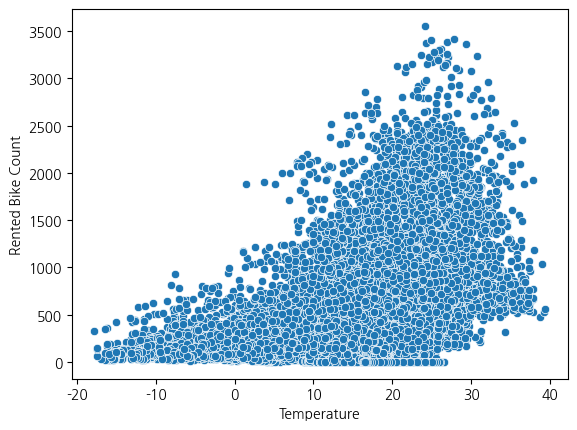

In [29]:
sns.scatterplot(x=data_train['Temperature'], y=data_train['Rented Bike Count'])
plt.show()

온도가 높아질수록 따릉이 대여량 증가하는 추세를 확인할 수 있다.

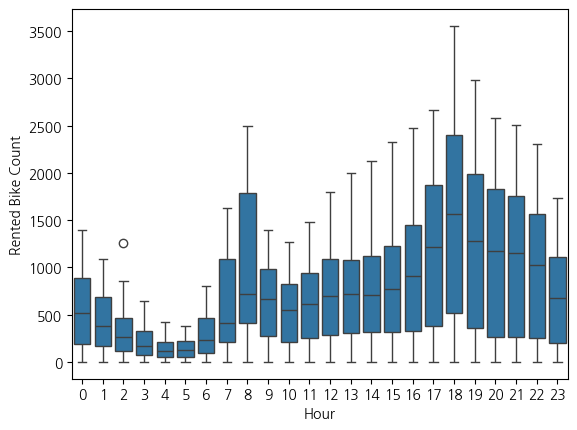

In [30]:
sns.boxplot(x=data_train['Hour'], y=data_train['Rented Bike Count'])
plt.show()

출퇴근 시간대인 오전8시, 오후5시~오후21시가 따릉이 대여량이 높게 나타난다는 것을 알 수 있다.

In [31]:
data_train["Seasons"].isna().sum()

np.int64(802)

In [32]:
data_test["Seasons"].isna().sum()

np.int64(74)

In [33]:
data_train['Seasons']=(
    data_train['Seasons']
    .ffill()   # 앞값으로 채우기
    .bfill()   # 맨 앞이 NaN이므로 뒤값으로 채우기
)
data_test['Seasons']=(
    data_test['Seasons'].ffill())

In [34]:
print("남은 Seasons 결측치:", data_train['Seasons'].isna().sum())
print("남은 Seasons 결측치:", data_test['Seasons'].isna().sum())

남은 Seasons 결측치: 0
남은 Seasons 결측치: 0


In [ ]:
data_train['Bad_weather_score'] = (
    0.5 * data_train['Rainfall(mm)'] +
    0.7 * data_train['Snowfall (cm)'] +
    0.3 * (100 - data_train['Visibility (10m)'])
)
#악천후지수

In [35]:
data_train['Temp * Hour'] = data_train['Temperature'] * data_train['Hour']
data_test['Temp * Hour']  = data_test['Temperature']  * data_test['Hour']

Temperature와 Hour의 곱으로 생성한 상호작용 변수는 특정 시간대에서의 온도 효과를 반영하기 위한 것으로, 일부 값이 0이 되더라도 이는 해당 시간대 또는 온도 조건에서 영향이 작다는 정보를 담고 있어 모델 학습에 유의미하다.

In [36]:
data_train.head(5)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility (10m),Dewpoint,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Temp * Hour
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-5.5
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,-12.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-18.6
4,01/12/2017,78,4,-6.0,36,1.6,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-24.0


In [37]:
data_test.head(5)

,Date,Hour,Temperature,Humidity,Wind speed,Visibility (10m),Dewpoint,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Temp * Hour
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,0.0
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,5.1
2,01/11/2018,2,4.4,64,1.2,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,8.8
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,12.6
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,14.4


In [38]:
print(data_train['Temp * Hour'].isna().sum())
print(data_test['Temp * Hour'].isna().sum())

0
0


In [41]:
# 범주형 변수 인코딩
data_train = pd.get_dummies(
    data_train,
    columns=['Seasons', 'Holiday', 'Functioning Day'],
    drop_first=True
)

data_test = pd.get_dummies(
    data_test,
    columns=['Seasons', 'Holiday', 'Functioning Day'],
    drop_first=True
)


In [42]:
data_test = data_test.reindex(columns=data_train.columns, fill_value=0)

In [43]:
from sklearn.model_selection import train_test_split

X = data_train.drop(columns=['Rented Bike Count', 'Date'])
y = data_train['Rented Bike Count']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# 검증 성능 확인
val_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 224.15662369657073


In [45]:
# test에는 목표변수가 없으므로 Date만 빼고 사용
X_test = data_test.drop(columns=['Date'], errors='ignore')

test_pred = rf.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Rented Bike Count


In [46]:
X = data_train.drop(columns=['Rented Bike Count', 'Date'])
X_test = data_test.reindex(columns=X.columns, fill_value=0)
test_pred = rf.predict(X_test)

In [47]:
submission = pd.DataFrame({
    "Date": data_test["Date"],
    "Predicted_Rented_Bike_Count": test_pred
})

submission.to_csv("submission_rf_temp_hour.csv", index=False, encoding="cp949")

print("파일 생성 완료: submission_rf_temp_hour.csv")

파일 생성 완료: submission_rf_temp_hour.csv


따릉이 대여량은 단순히 선형적인 관계가 아니라 시간대, 기온, 강수, 바람, 습도 등이 복합적으로 작용한다. 랜덤포레스트는 여러 개의 의사결정나무를 결합한 앙상블 모델로, 이러한 비선형 관계와 변수 간 상호작용을 자동으로 학습할 수 있다는 점이 가장 큰 장점입니다.